In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from PIL import Image
from keras.utils import to_categorical

from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:


# 데이터셋 폴더 경로
dataset_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/'

# 이미지 크기
img_size = (224, 224)

# 이미지 데이터와 라벨을 저장할 리스트 초기화
images = []
labels = []

# ng 이미지 로드


ng_path = os.path.join(dataset_path, 'ng')
ng_files = os.listdir(ng_path)
for filename in ng_files:
    # 이미지 로드
    img_path = os.path.join(ng_path, filename)
    img = Image.open(img_path)
    img = img.resize(img_size)
    img = np.array(img) / 255.0
    # 이미지 데이터와 라벨을 리스트에 추가
    images.append(img)
    labels.append(0)

# good 이미지 로드
good_path = os.path.join(dataset_path, 'good')
good_files = os.listdir(good_path)
for filename in good_files:
    # 이미지 로드
    img_path = os.path.join(good_path, filename)
    img = Image.open(img_path)
    img = img.resize(img_size)
    img = np.array(img) / 255.0
    # 이미지 데이터와 라벨을 리스트에 추가
    images.append(img)
    labels.append(1)

# 리스트를 넘파이 배열로 변환
images = np.array(images)
labels = np.array(labels)


In [ ]:

# 이미지 데이터 전처리
images = images.reshape(-1, img_size[0], img_size[1], 3)

# 라벨 데이터 전처리
labels = to_categorical(labels)

# 학습용 데이터와 검증용 데이터로 분할

train_images, val_images, train_labels, val_labels = train_test_split(images, labels, test_size=0.2, random_state=42)


In [ ]:
print(train_images[1].shape)
print(val_images[1].shape)

(224, 224, 3)
(224, 224, 3)


In [ ]:
# 입력 레이어 정의
input_layer = Input(shape=(img_size[0], img_size[1], 3))

# 합성곱 레이어 정의
conv_layer1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(input_layer)
max_pooling_layer1 = MaxPooling2D(pool_size=(2, 2))(conv_layer1)

conv_layer2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu')(max_pooling_layer1)
max_pooling_layer2 = MaxPooling2D(pool_size=(2, 2))(conv_layer2)

# 전결합층 정의
flatten_layer = Flatten()(max_pooling_layer2)
dense_layer1 = Dense(units=128, activation='relu')(flatten_layer)
output_layer = Dense(units=2, activation='softmax')(dense_layer1)

# 모델 생성
model = Model(inputs=input_layer, outputs=output_layer)


early_stop = EarlyStopping(monitor='val_loss', patience=3)


# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    batch_size=32, validation_data=(val_images, val_labels),
                    callbacks=[early_stop])


Epoch 1/10
14/14 [==============================] - 52s 4s/step - loss: 2.6261 - accuracy: 0.7091 - val_loss: 0.5849 - val_accuracy: 0.7818
Epoch 2/10
14/14 [==============================] - 51s 4s/step - loss: 0.4941 - accuracy: 0.8045 - val_loss: 0.4609 - val_accuracy: 0.7818
Epoch 3/10
14/14 [==============================] - 48s 3s/step - loss: 0.3733 - accuracy: 0.8273 - val_loss: 0.3530 - val_accuracy: 0.7909
Epoch 4/10
14/14 [==============================] - 51s 4s/step - loss: 0.2366 - accuracy: 0.9159 - val_loss: 0.2224 - val_accuracy: 0.9273
Epoch 5/10
14/14 [==============================] - 50s 4s/step - loss: 0.0966 - accuracy: 0.9727 - val_loss: 0.3390 - val_accuracy: 0.8545
Epoch 6/10
14/14 [==============================] - 47s 3s/step - loss: 0.0791 - accuracy: 0.9818 - val_loss: 0.1884 - val_accuracy: 0.9273
Epoch 7/10
14/14 [==============================] - 47s 3s/step - loss: 0.0205 - accuracy: 1.0000 - val_loss: 0.1550 - val_accuracy: 0.9545
Epoch 8/10
14/14 [==

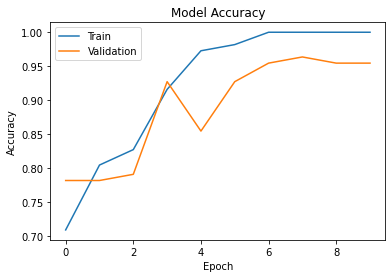

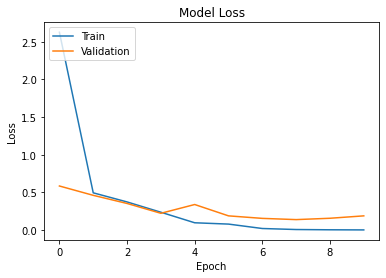

In [ ]:
# accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# loss 그래프
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


4/4 [==============================] - 3s 616ms/step


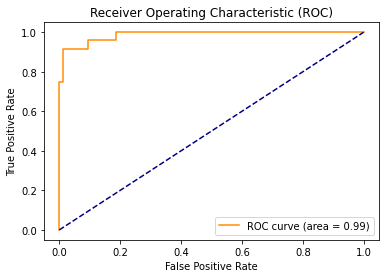

In [ ]:

# 검증용 데이터에 대한 예측값 계산
val_pred = model.predict(val_images)

# auc, roc 그래프 출력
fpr, tpr, thresholds = roc_curve(np.argmax(val_labels, axis=1), val_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# 모델 평가
test_loss, test_acc = model.evaluate(val_images, val_labels)
print('Test accuracy:', test_acc)

4/4 [==============================] - 3s 623ms/step - loss: 0.1884 - accuracy: 0.9545
Test accuracy: 0.9545454382896423


1/1 [==============================] - 0s 54ms/step


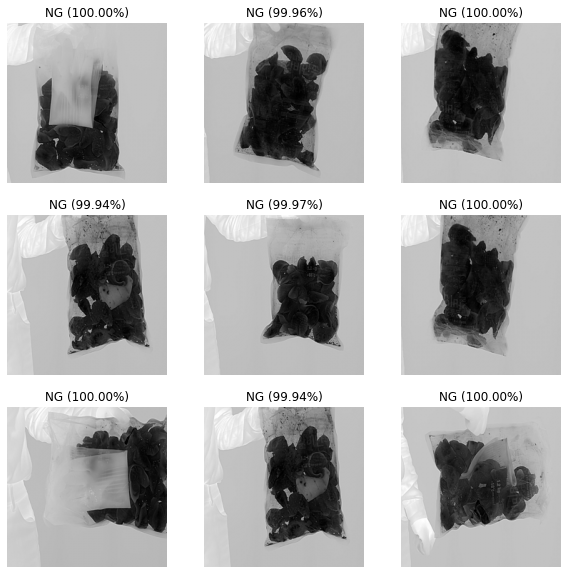

In [ ]:
import matplotlib.pyplot as plt

# 검증 데이터에서 무작위로 이미지와 예측값 출력
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, 9):
    index = np.random.randint(0, len(val_images))
    image = val_images[index]
    axes[i].imshow(image)
    axes[i].axis('off')
    pred = model.predict(np.expand_dims(image, axis=0))[0]
    label = np.argmax(val_labels[index])
    if pred[0] > pred[1]:
        axes[i].set_title('NG ({:.2f}%)'.format(pred[0] * 100))
    else:
        axes[i].set_title('GOOD ({:.2f}%)'.format(pred[1] * 100))
plt.show()


# resnet50


In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

# ResNet50 모델 불러오기
resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(img_size[0], img_size[1], 3))

# 입력 레이어 정의
input_layer = resnet.input

# 합성곱 레이어 정의
x = resnet.output
x = Flatten()(x)
x = Dense(units=128, activation='relu')(x)
output_layer = Dense(units=2, activation='softmax')(x)

# 모델 생성
model = Model(inputs=input_layer, outputs=output_layer)

# 미세 조정(fine-tuning)을 위해 모든 레이어 동결 해제
for layer in model.layers:
    layer.trainable = True

early_stop = EarlyStopping(monitor='val_loss', patience=3)

# 모델 컴파일
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
# 학습시작
# 모델 학습
history = model.fit(train_images, train_labels, epochs=10,
                    batch_size=32, validation_data=(val_images, val_labels),
                    callbacks=[early_stop])


Epoch 1/10
14/14 [==============================] - 50s 562ms/step - loss: 4.3295 - accuracy: 0.7568 - val_loss: 1347993.1250 - val_accuracy: 0.7818
Epoch 2/10
14/14 [==============================] - 4s 322ms/step - loss: 0.5014 - accuracy: 0.8045 - val_loss: 622350.9375 - val_accuracy: 0.7818
Epoch 3/10
14/14 [==============================] - 5s 324ms/step - loss: 0.3987 - accuracy: 0.8045 - val_loss: 8.6141 - val_accuracy: 0.7818
Epoch 4/10
14/14 [==============================] - 5s 324ms/step - loss: 0.2599 - accuracy: 0.8045 - val_loss: 0.6825 - val_accuracy: 0.7818
Epoch 5/10
14/14 [==============================] - 5s 326ms/step - loss: 0.2237 - accuracy: 0.8045 - val_loss: 0.6570 - val_accuracy: 0.7818
Epoch 6/10
14/14 [==============================] - 5s 327ms/step - loss: 0.6615 - accuracy: 0.8045 - val_loss: 16039110.0000 - val_accuracy: 0.7818
Epoch 7/10
14/14 [==============================] - 5s 328ms/step - loss: 0.7490 - accuracy: 0.8045 - val_loss: 472424.5000 - val

# ImageDataGenerator

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지 크기
img_size = (224, 224)

# 데이터 증강 및 전처리 정의
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# 학습 및 검증용 데이터 생성
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    classes=['ng', 'good'])

val_generator = val_datagen.flow_from_directory(val_dir,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                classes=['ng', 'good'])

# 모델 학습
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n // batch_size,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=val_generator.n // batch_size,
                              class_weight={0: 4.0, 1: 1.0})


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

# 데이터 경로 설정
dataset_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img_hori'


# 이미지 크기
img_size = (224, 224)

# 배치 사이즈
batch_size = 16

# 데이터 증강 및 전처리 정의
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=2,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=False,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# 학습 및 검증용 데이터 생성
train_generator = train_datagen.flow_from_directory(dataset_path,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    classes=['ng', 'good'])

val_generator = val_datagen.flow_from_directory(dataset_path,
                                                target_size=img_size,
                                                batch_size=batch_size,
                                                class_mode='categorical',
                                                classes=['ng', 'good'])

# 모델 생성
input_tensor = Input(shape=(img_size[0], img_size[1], 3))
base_model = ResNet50(weights='imagenet', include_top=False, input_tensor=input_tensor)
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output_tensor = Dense(2, activation='softmax')(x)
model = Model(inputs=input_tensor, outputs=output_tensor)

# 기존 모델 가중치 동결
for layer in base_model.layers:
    layer.trainable = False

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3)


# 모델 학습
history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.n // batch_size,
                              epochs=10,
                              validation_data=val_generator,
                              validation_steps=val_generator.n // batch_size,
                              callbacks = [early_stop],
                              class_weight={0: 4.0, 1: 1.0})



Found 932 images belonging to 2 classes.
Found 932 images belonging to 2 classes.


<ipython-input-3-c7cba5cf9718>:73: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
58/58 [==============================] - 29s 414ms/step - loss: 3.9485 - accuracy: 0.8657 - val_loss: 0.3502 - val_accuracy: 0.8858
Epoch 2/10
58/58 [==============================] - 23s 396ms/step - loss: 0.6688 - accuracy: 0.8854 - val_loss: 0.5511 - val_accuracy: 0.8847
Epoch 3/10
58/58 [==============================] - 27s 475ms/step - loss: 0.6213 - accuracy: 0.8865 - val_loss: 0.3794 - val_accuracy: 0.8858
Epoch 4/10
58/58 [==============================] - 27s 469ms/step - loss: 0.6127 - accuracy: 0.8854 - val_loss: 0.3822 - val_accuracy: 0.8869


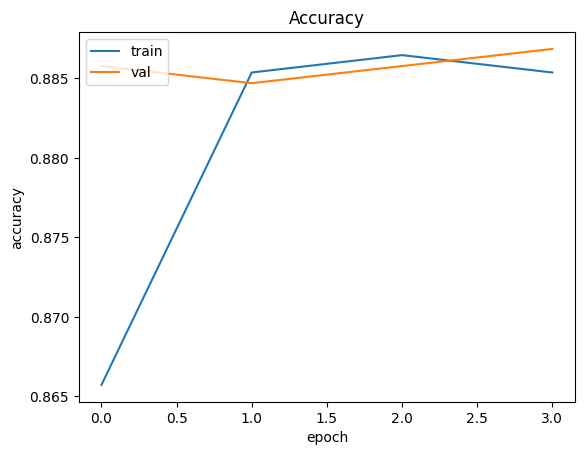

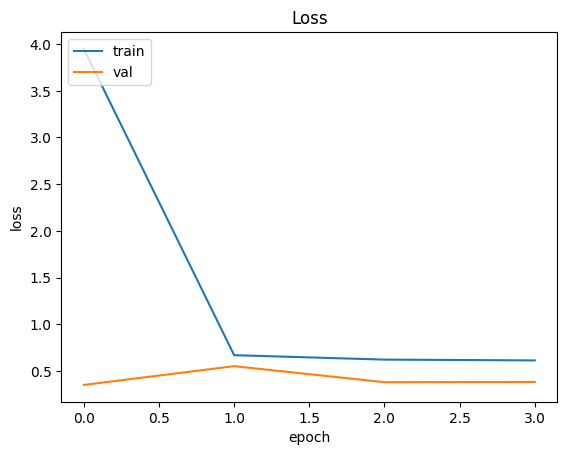

In [ ]:

# 정확도, 손실 그래프 출력
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


59/59 [==============================] - 8s 120ms/step


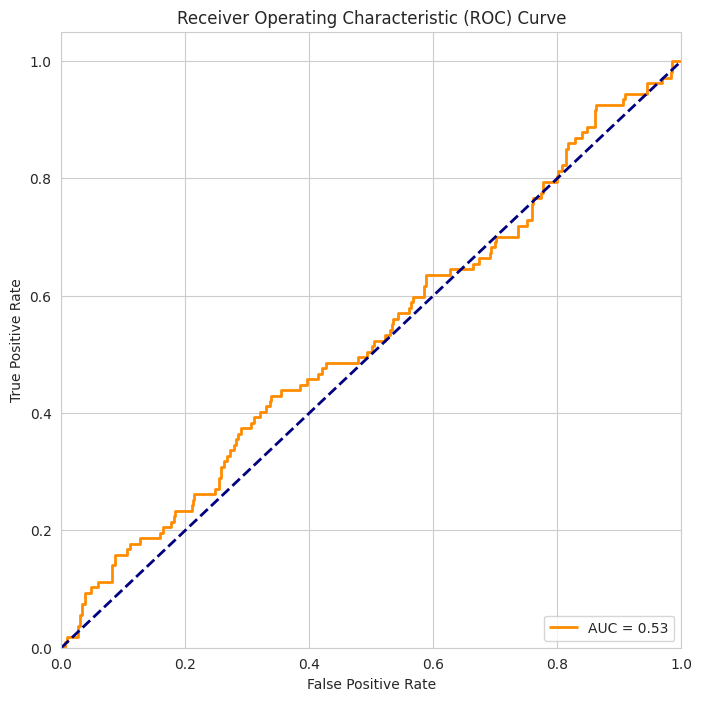

In [ ]:
# auc, roc 그래프 출력
from sklearn.metrics import roc_curve, auc
import seaborn as sns

val_labels = val_generator.classes
val_pred = model.predict(val_generator)

fpr, tpr, _ = roc_curve(val_labels, val_pred[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
sns.set_style('whitegrid')
plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


1/1 [==============================] - 0s 60ms/step


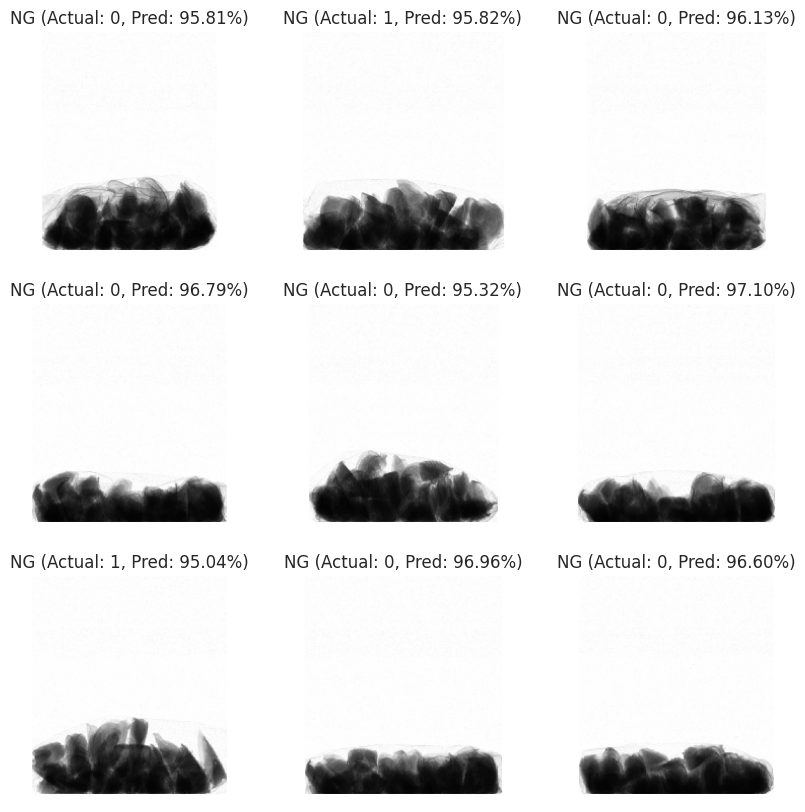

In [ ]:
import matplotlib.pyplot as plt

# 검증 데이터에서 무작위로 이미지와 예측값 출력
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))
axes = axes.ravel()
for i in np.arange(0, 9):
    index = np.random.randint(0, len(val_generator))
    image, label = val_generator[index]
    axes[i].imshow(image[0])
    axes[i].axis('off')
    pred = model.predict(image)[0]
    if pred[0] > pred[1]:
        axes[i].set_title('NG (Actual: {}, Pred: {:.2f}%)'.format(np.argmax(label), pred[0] * 100))
    else:
        axes[i].set_title('GOOD (Actual: {}, Pred: {:.2f}%)'.format(np.argmax(label), pred[1] * 100))
plt.show()


# 전이학습 모델 2

In [ ]:
!pip install tensorflow-addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 612.1/612.1 kB 11.8 MB/s eta 0:00:00


In [ ]:
# 필요한 라이브러리를 불러오기
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from keras import backend as K
from tensorflow.python.eager.context import monitoring
from tensorflow.keras.applications import EfficientNetB0, MobileNetV2
import tensorflow_addons as tfa

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [ ]:

# 학습 및 테스트 이미지 경로
train_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/test'

# 이미지 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', subset='validation')

# ResNet50 모델 불러오기 (pretrained, include_top=False로 설정하여 Fully Connected Layer 제외)
base_model = ResNet50(weights='imagenet', include_top=False)


# F1 Score를 계산하는 함수를 정의합니다.
def f1_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))

    precision = true_positives / (predicted_positives + K.epsilon())
    recall = true_positives / (possible_positives + K.epsilon())
    f1_val = 2*(precision*recall)/(precision+recall+K.epsilon())

    return f1_val



# 새로운 Fully Connected Layer 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)  # 과적합 방지를 위해 Dropout 층 추가
predictions = Dense(1, activation='sigmoid')(x) # binary classification을 위한 sigmoid 활성화 함수 사용

# 최종 모델 생성
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy', metrics=['accuracy', f1_score, Precision(), Recall()])

# EarlyStopping과 ModelCheckpoint 정의
early_stop = EarlyStopping(monitor='val_f1_score', patience=3, mode='max', verbose=1)  # validation의 F1 score를 모니터링
check_point = ModelCheckpoint('best_model.h5', monitor='val_f1_score', mode='max', save_best_only=True, verbose=1)

# 모델 학습
history = model.fit(train_generator, validation_data=validation_generator, epochs=10, verbose=1, callbacks=[early_stop, check_point])

# loss, accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# 모델 저장
model.save('my_model.h5')


Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Epoch 1/10


KeyboardInterrupt: ignored

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

# 테스트 데이터 제너레이터 생성
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

# 모델 불러오기
# 모델 불러오기
model = load_model('/content/best_model.h5', custom_objects={'f1_score': f1_score})


# 테스트 데이터 예측
predictions = model.predict(test_generator)

# 각 예측에 대해 good 또는 ng 판정
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

# 예측 확률을 리스트로 변환
predicted_prob = [pred[0] for pred in predictions]

# 확률에 따라 "Good" 또는 "NG"로 변환
predicted_classes = ["Good" if prob >= 0.8 else "NG" for prob in predicted_prob]

# 파일명, 예측 결과 및 예측 확률 출력
for filename, prediction, prob in zip(test_generator.filenames, predicted_classes, predicted_prob):
    print(f'Filename: {filename}, Prediction: {prediction}, Probability: {prob:.2%}')



Found 10 images belonging to 2 classes.
1/1 [==============================] - 1s 962ms/step
Filename: good/2022-12-27-150437226.jpg, Prediction: Good, Probability: 56.24%
Filename: good/2022-12-27-150442131.jpg, Prediction: Good, Probability: 56.44%
Filename: good/2022-12-27-150455831.jpg, Prediction: Good, Probability: 55.86%
Filename: good/2022-12-27-150500626.jpg, Prediction: Good, Probability: 56.06%
Filename: good/2022-12-27-150505141.jpg, Prediction: Good, Probability: 55.62%
Filename: ng/2022-12-27-153729773.jpg, Prediction: Good, Probability: 54.70%
Filename: ng/2022-12-27-153741302.jpg, Prediction: Good, Probability: 55.11%
Filename: ng/2022-12-27-153800391.jpg, Prediction: Good, Probability: 54.56%
Filename: ng/2022-12-27-153820027.jpg, Prediction: Good, Probability: 54.89%
Filename: ng/2022-12-27-160422438.jpg, Prediction: Good, Probability: 55.62%


# EfficientNetB0

In [ ]:
from tensorflow.python.eager.context import monitoring
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# 학습 및 테스트 이미지 경로
train_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/train'
test_dir = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/test'

# 이미지 데이터 제너레이터 생성
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', subset='training')
validation_generator = train_datagen.flow_from_directory(train_dir, target_size=(224, 224), batch_size=32, class_mode='binary', subset='validation')

# EfficientNetB0 모델 불러오기
base_model = EfficientNetB0(weights='imagenet', include_top=False)

# 새로운 Fully Connected Layer 추가
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# 최종 모델 생성
model = Model(inputs=base_model.input, outputs=predictions)

# 모델 컴파일
model.compile(optimizer=Adam(lr=0.0001), loss='binary_crossentropy',
              metrics=['accuracy', Precision(), Recall()])

# EarlyStopping과 ModelCheckpoint 정의
early_stop = EarlyStopping(monitor='val_accuracy', patience=3, mode='max', verbose=1)
check_point = ModelCheckpoint('efficientnetb0_best_weights.h5', monitor='val_accuracy', mode='max', save_best_only=True, save_weights_only=True, verbose=1)

# 모델 학습
history = model.fit(train_generator, validation_data=validation_generator, epochs=30, verbose=1, callbacks=[early_stop, check_point])

# 모델의 가중치 저장
model.save_weights('temp_cam_efficientnetb0_my_model_weights.h5')


Found 324 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


Epoch 1/30
11/11 [==============================] - ETA: 0s - loss: 0.2242 - accuracy: 0.9043 - precision_10: 0.9375 - recall_10: 0.9336
Epoch 1: val_accuracy improved from -inf to 0.25000, saving model to efficientnetb0_best_weights.h5
11/11 [==============================] - 56s 917ms/step - loss: 0.2242 - accuracy: 0.9043 - precision_10: 0.9375 - recall_10: 0.9336 - val_loss: 5.4628 - val_accuracy: 0.2500 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 2/30
11/11 [==============================] - ETA: 0s - loss: 0.1275 - accuracy: 0.9630 - precision_10: 0.9831 - recall_10: 0.9668
Epoch 2: val_accuracy did not improve from 0.25000
11/11 [==============================] - 7s 570ms/step - loss: 0.1275 - accuracy: 0.9630 - precision_10: 0.9831 - recall_10: 0.9668 - val_loss: 1.8480 - val_accuracy: 0.2500 - val_precision_10: 0.0000e+00 - val_recall_10: 0.0000e+00
Epoch 3/30
11/11 [==============================] - ETA: 0s - loss: 0.0779 - accuracy: 0.9691 - precision_10

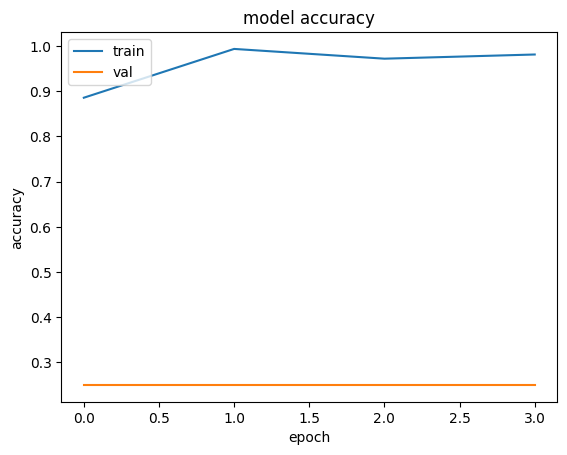

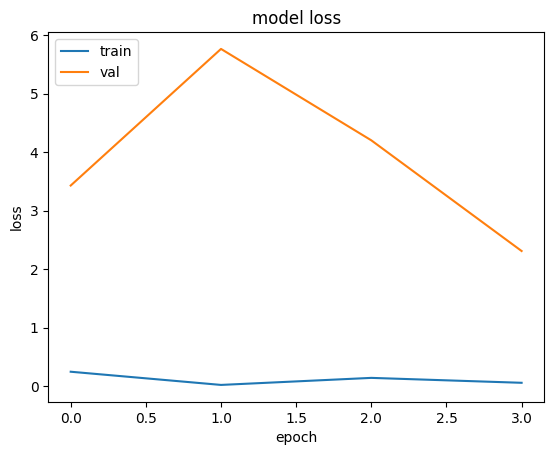

In [ ]:
# loss, accuracy 그래프
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dropout, Dense
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import time

# 테스트 데이터 제너레이터 생성
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)

# 모델 구조 정의
base_model = EfficientNetB0(weights=None, include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# 최종 모델 생성
model = Model(inputs=base_model.input, outputs=predictions)

# 가중치 불러오기
model.load_weights('/content/temp_cam_efficientnetb0_my_model_weights.h5')

# 테스트 데이터 예측 및 inference time 측정
start_time = time.time()
predictions = model.predict(test_generator)
end_time = time.time()
inference_time = end_time - start_time

# 각 예측에 대해 good 또는 ng 판정
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predicted_classes = np.where(predictions >= 0.8, "Good", "NG")

# 파일명, 예측 결과 및 예측 확률, inference time 출력
for filename, prediction, prob in zip(test_generator.filenames, predicted_classes, predictions):
    print(f'Filename: {filename}, Prediction: {prediction}, Probability: {prob[0]:.2%}, Inference time: {inference_time:.2f} seconds')


Found 8 images belonging to 2 classes.


1/1 [==============================] - 2s 2s/step
Filename: good/Snap-0106.jpg, Prediction: ['NG'], Probability: 2.60%, Inference time: 4.60 seconds
Filename: good/Snap-0111.jpg, Prediction: ['NG'], Probability: 2.59%, Inference time: 4.60 seconds
Filename: good/Snap-0117.jpg, Prediction: ['NG'], Probability: 2.61%, Inference time: 4.60 seconds
Filename: good/Snap-0121.jpg, Prediction: ['NG'], Probability: 2.61%, Inference time: 4.60 seconds
Filename: ng/Snap-0231.jpg, Prediction: ['NG'], Probability: 2.61%, Inference time: 4.60 seconds
Filename: ng/Snap-0489.jpg, Prediction: ['NG'], Probability: 2.60%, Inference time: 4.60 seconds
Filename: ng/Snap-0498.jpg, Prediction: ['NG'], Probability: 2.61%, Inference time: 4.60 seconds
Filename: ng/Snap-0505.jpg, Prediction: ['NG'], Probability: 2.61%, Inference time: 4.60 seconds
